# UCalgary Qiskit Workshop: Introduction

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_gate_map

from qiskit_ibm_runtime import QiskitRuntimeService

## Setting up Qiskit Runtime

In [ ]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="MY_IBM_QUANTUM_TOKEN")

In [ ]:
service = QiskitRuntimeService(channel="ibm_quantum", instance='HUB/GROUP/PROJECT')

In [3]:
service = QiskitRuntimeService(name='pinq2')

# Building quantum circuits

Goal: Create the $\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$ entangled state

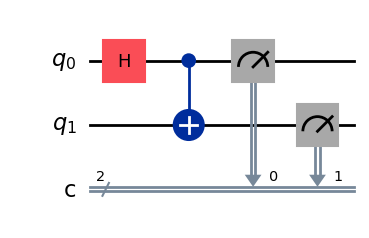

In [4]:
# Create Bell state circuit
bell_circ = QuantumCircuit(2,2)
bell_circ.h(0)
bell_circ.cx(0, 1)
bell_circ.measure([0,1], [0,1])
bell_circ.draw()

In [5]:
from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()

pub = (bell_circ)
job = sampler.run([pub])
result = job.result()
print(result)

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


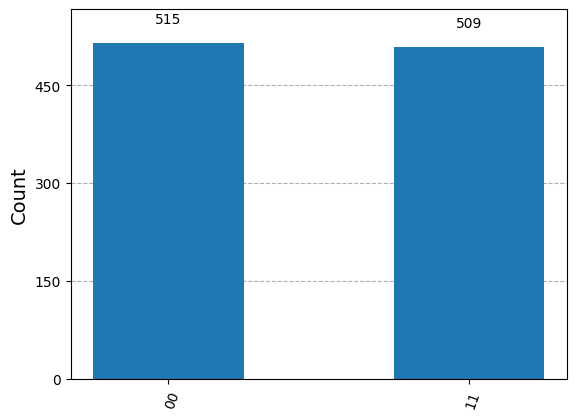

In [6]:
counts = result[0].data.c.get_counts()
plot_histogram(counts)

# Running on a real quantum computer

In [7]:
service.backends()

[<IBMBackend('ibm_quebec')>]

In [8]:
# Select the backend you want
backend = service.backend('ibm_quebec')

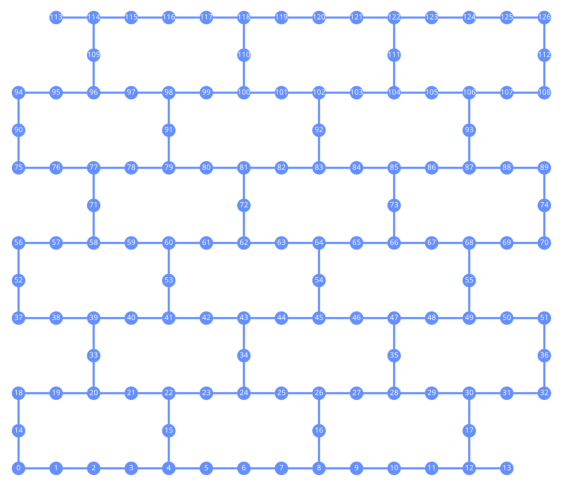

In [9]:
plot_gate_map(backend, figsize=(7, 7), font_size=14)

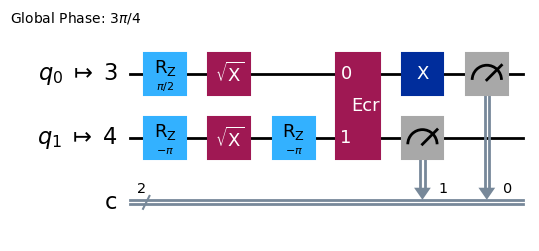

In [10]:
# Transpile the circuit before running on the real quantum hardware

bell_circ_t = transpile(bell_circ, backend, optimization_level=2)
bell_circ_t.draw(idle_wires=False)

In [11]:
# Run the circuit
from qiskit_ibm_runtime import Sampler

sampler = Sampler(mode=backend)
pub = (bell_circ_t)
job_ibmq = sampler.run([pub], shots=1024)
job_ibmq.job_id()

'cwmdqjpmptp000863qdg'

In [16]:
# Get job status
print(job_ibmq.status())

DONE


In [17]:
# Plot histogram of results. Note the noise in the system
# results in states that should not appear in the measurements.
result = job_ibmq.result()
print(result)

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-04 14:42:45', stop='2024-11-04 14:43:00', size=1024>)])}, 'version': 2})


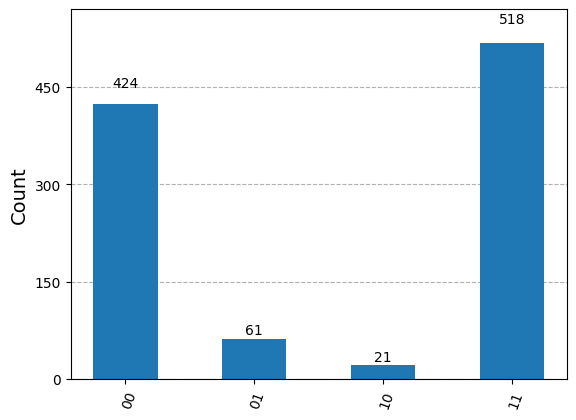

In [18]:
counts = result[0].data.c.get_counts()
plot_histogram(counts)

## Verifying circuits with local testing mode

In [19]:
from qiskit_ibm_runtime.fake_provider import FakeQuebec

fake_quebec_backend = FakeQuebec()

In [20]:
bell_circ_t_fake = transpile(bell_circ, fake_quebec_backend)

sampler = Sampler(mode=fake_quebec_backend)
pub = (bell_circ_t_fake)
job_fake = sampler.run([pub])

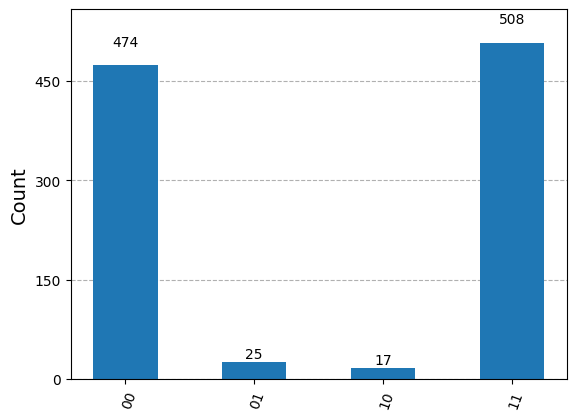

In [21]:
result = job_fake.result()
counts = result[0].data.c.get_counts()
plot_histogram(counts)

In [22]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version

print("Qiskit version:", qiskit_version)
print("Qiskit Runtime version:", runtime_version)

Qiskit version: 1.2.4
Qiskit Runtime version: 0.32.0
